# Loan Payback Prediction

<img src="loanpic.png" width = '800' height = '400' />

### Importing the Required Libraries and Loading the dataset

In [94]:
# Importing the Required Libraries 

import numpy as np 
import pandas as pd 
from pandas import plotting
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# importing the dataset
dataset = pd.read_csv('application_data.csv')
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
print(dataset.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [6]:
dataset.isnull().sum(axis=0).reset_index()

,index,0
0,SK_ID_CURR,0
1,TARGET,0
2,NAME_CONTRACT_TYPE,0
3,CODE_GENDER,0
4,FLAG_OWN_CAR,0
5,FLAG_OWN_REALTY,0
6,CNT_CHILDREN,0
7,AMT_INCOME_TOTAL,0
8,AMT_CREDIT,0
9,AMT_ANNUITY,12


In [7]:
dataset.shape

(307511, 122)

As the dataset is really huge, we would consider 5000 rows for further analysis.


In [8]:
df = dataset.iloc[:5001]

## Exploratory Data Analysis

In [64]:
df.iloc[0:1,0:20]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0


Text(0.5, 1.0, 'Contract Type opted the People')

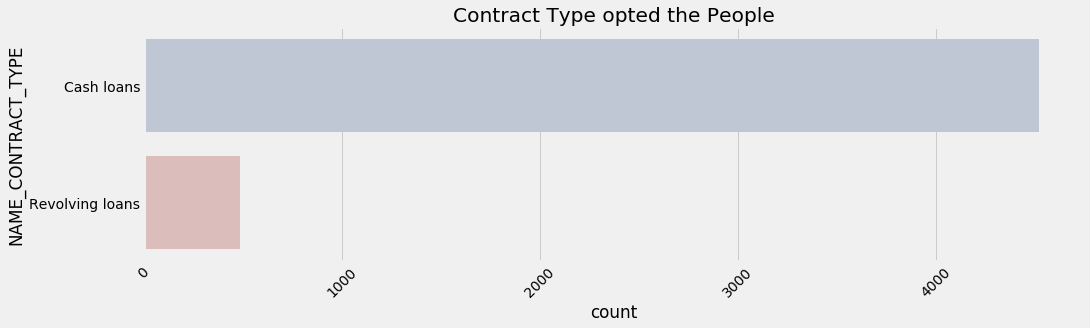

In [67]:
plt.figure(figsize=(15,4))
sns.countplot(y="NAME_CONTRACT_TYPE",palette="vlag", data=df)
plt.xticks(rotation = 45)
plt.title('Contract Type opted the People')

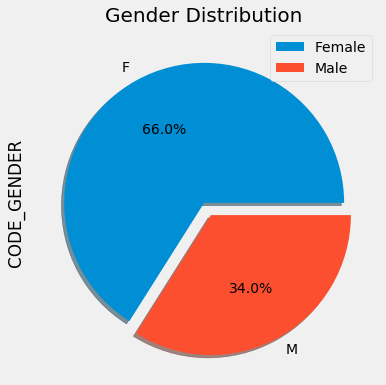

In [65]:
df["CODE_GENDER"].value_counts().plot(kind='pie',explode=[0,0.1],figsize=(6,6),autopct='%1.1f%%',shadow=True)
plt.title("Gender Distribution",fontsize=20)
plt.legend(["Female","Male",])
plt.show()

Text(0.5, 1.0, 'Bar Chart plotted between Number of Children and Total Income')

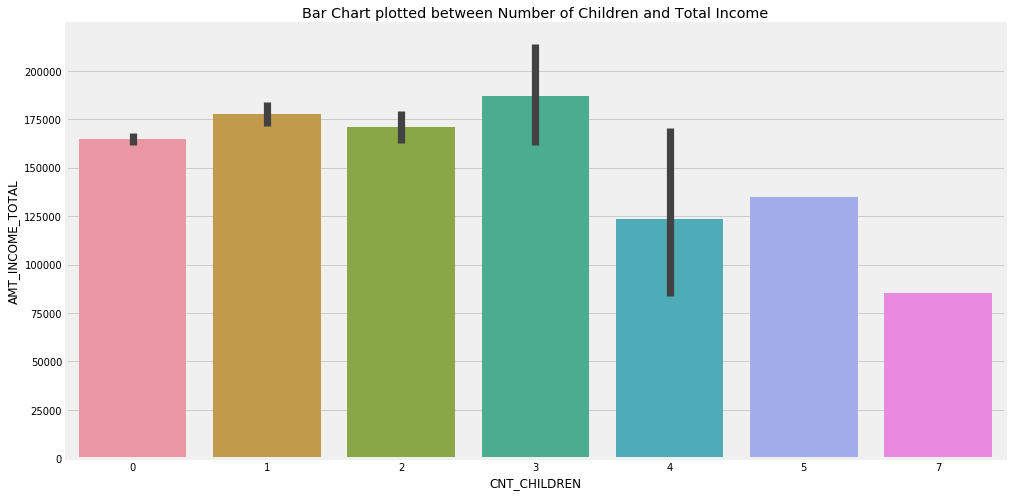

In [112]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="CNT_CHILDREN", y="AMT_INCOME_TOTAL", data=df)
plt.title('Bar Chart plotted between Number of Children and Total Income')

Text(0.5, 1.0, 'Contract type and Total Income')

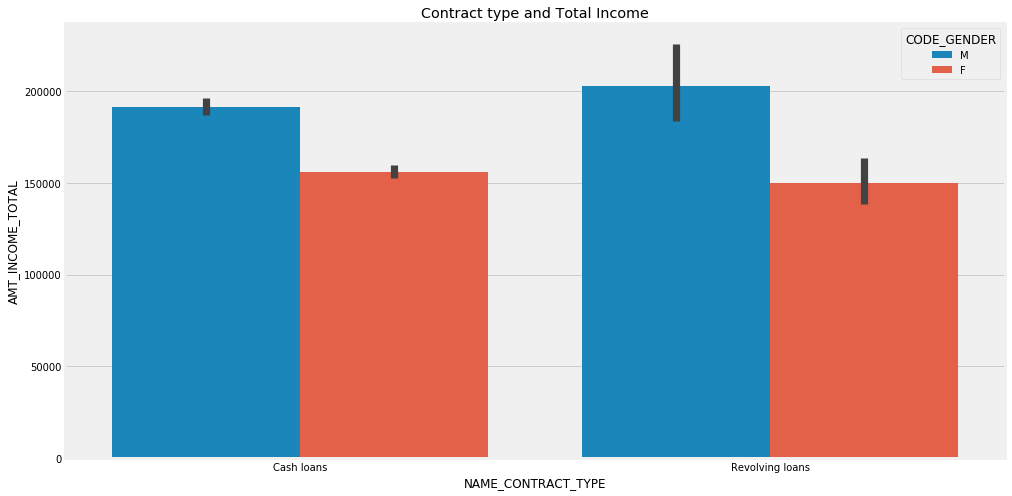

In [113]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="NAME_CONTRACT_TYPE", y="AMT_INCOME_TOTAL", hue="CODE_GENDER", data=df)
plt.title('Contract type and Total Income')


Text(0.5, 1.0, 'Bar plot between Income and Work type')

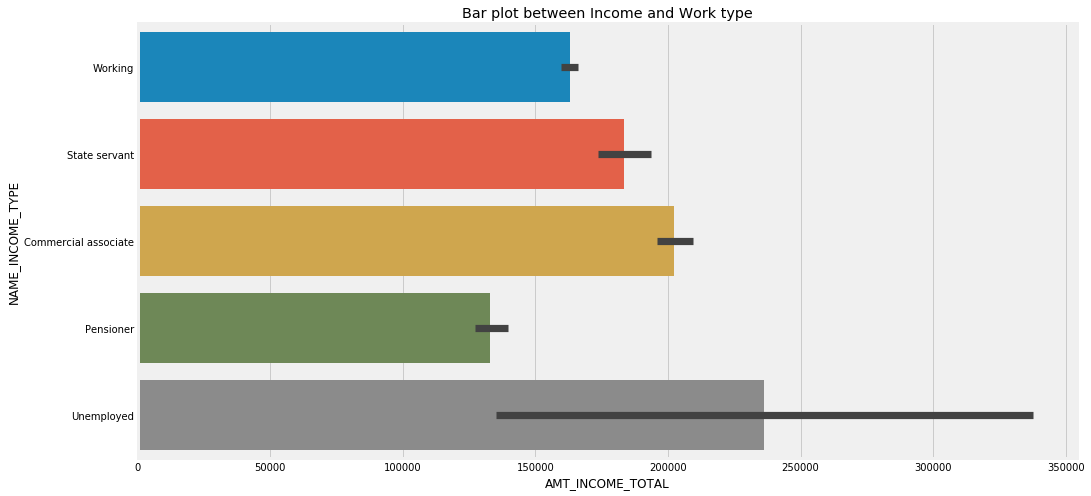

In [114]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="AMT_INCOME_TOTAL", y="NAME_INCOME_TYPE", data=df)
plt.title('Bar plot between Income and Work type')

Text(0.5, 1.0, 'Education Qualification of the People')

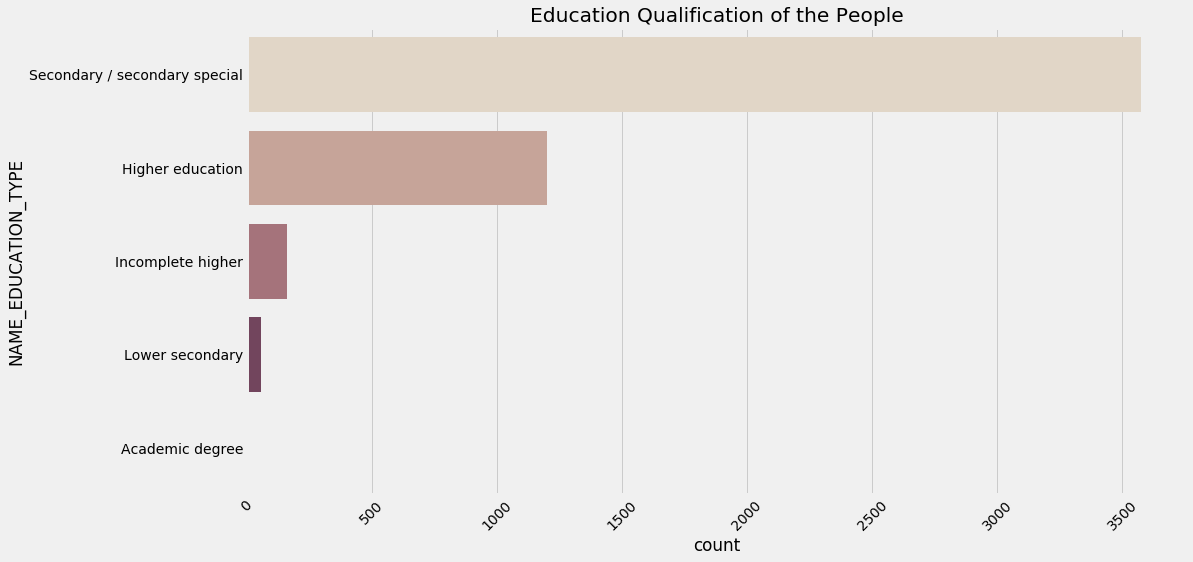

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(y="NAME_EDUCATION_TYPE",palette="ch:.25", data=df)
plt.xticks(rotation = 45)
plt.title('Education Qualification of the People')

Text(0.5, 1.0, 'Occupation of the People')

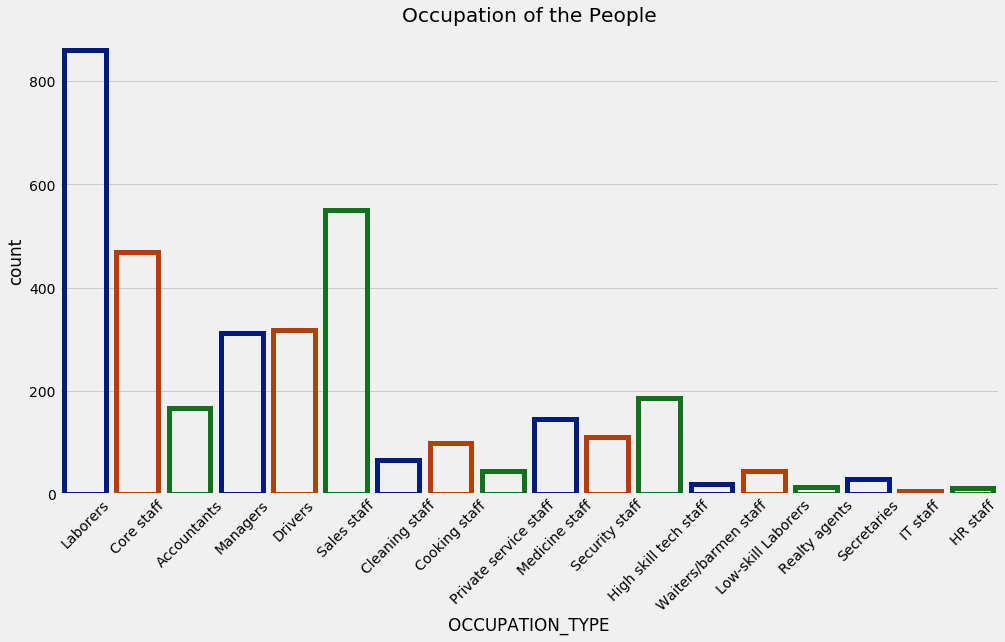

In [46]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="OCCUPATION_TYPE", data=df,

                   facecolor=(0, 0, 0, 0),

                   linewidth=5,

                   edgecolor=sns.color_palette("dark", 3))
plt.xticks(rotation = 45)
plt.title('Occupation of the People')

Text(0.5, 1.0, 'Amount Credited vs Organization people belog to')

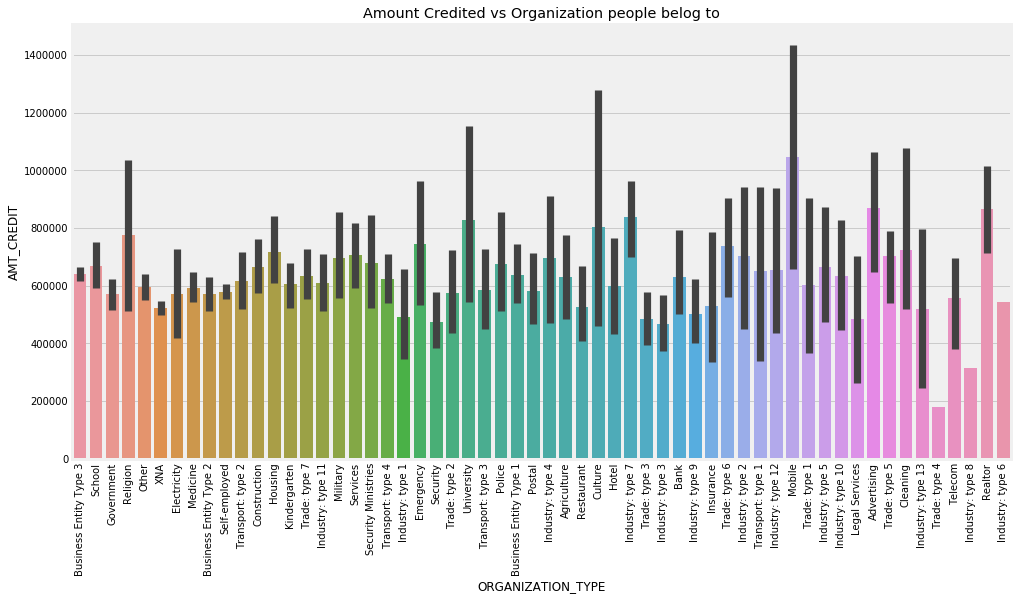

In [116]:
plt.figure(figsize=(15,8))
sns.barplot(x="ORGANIZATION_TYPE",y='AMT_CREDIT',data=df)
sns.cubehelix_palette(as_cmap=True)
plt.xticks(rotation = 90)
plt.title('Amount Credited vs Organization people belog to')

Text(0.5, 1.0, 'Scatter Plot between Average Land-area and Basement-area')

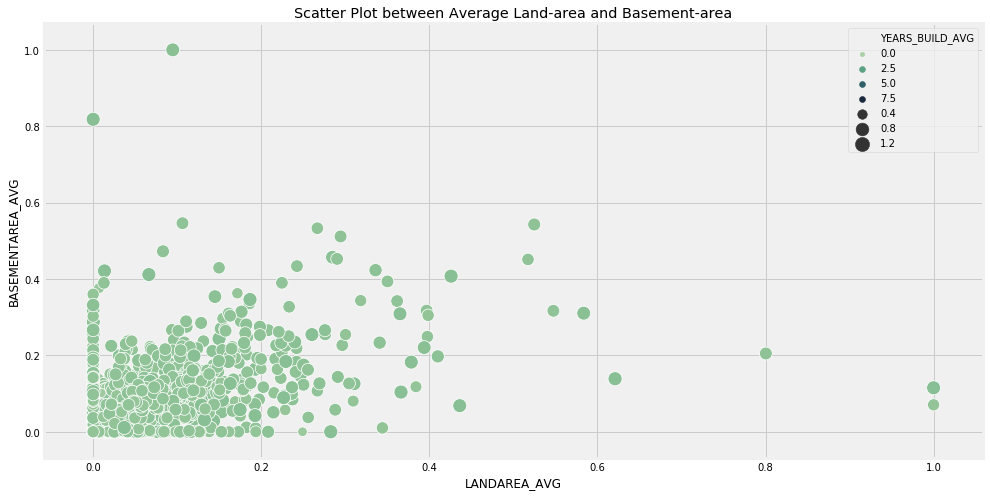

In [117]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data=df, x="LANDAREA_AVG", y="BASEMENTAREA_AVG", hue="YEARS_BUILD_AVG", size="YEARS_BUILD_AVG",
    sizes=(20, 200), hue_norm=(0, 7), palette="ch:r=-.5,l=.75"
)
plt.title('Scatter Plot between Average Land-area and Basement-area')